# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
! pip install fabric

In [2]:
from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt

### Personal Details

Below are the details needed to authenticate into the server and crete a client connection

In [3]:
host="ppolak5.ams.stonybrook.edu."
server_user= 'TEMP'
server_password='TEMP'
db_user='TEMP'
db_pass='TEMP'

In [4]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

Includes support for multiple exchanges  (Required by the Order Protection Rule)

In [5]:
exchange="'N','K','P','T','X','Z','Q','C','J','B','Y','V','M','A'" #all exchanges 
symbol='AAPL'
start= "2020-01-01"
end="2020-01-10"


In [6]:
result=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Trade Query for 'N','K','P','T','X','Z','Q','C','J','B','Y','V','M','A' AAPL 2020-01-01 2020-01-10


/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [7]:
trades=pd.read_csv('data/AAPL_trades.csv')
trades=clean_trades(trades)
trades.to_csv('data/cleaned_trades.csv')
trades

,SIP_Timestamp,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Trade_Through_Exempt_Indicator,date
2020-01-02 09:30:00.134336,2020-01-02 09:30:00.134553,K,AAPL,250,296.24,@,N,0,19803,1100,,0,2020-01-02
2020-01-02 09:30:00.134371,2020-01-02 09:30:00.134577,K,AAPL,50,296.24,@ I,N,0,19804,1101,,0,2020-01-02
2020-01-02 09:30:00.134532,2020-01-02 09:30:00.134742,K,AAPL,108,296.21,@,N,0,19805,1102,,0,2020-01-02
2020-01-02 09:30:00.157191,2020-01-02 09:30:00.157563,P,AAPL,1,296.28,@F I,N,0,19878,1763,,1,2020-01-02
2020-01-02 09:30:00.157191,2020-01-02 09:30:00.157564,P,AAPL,1,296.28,@ Q,N,0,19879,1764,,0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-09 19:59:55.811102,2020-01-09 19:59:55.811487,P,AAPL,99,310.40,@ TI,N,0,3630463,33010,,0,2020-01-09
2020-01-09 19:59:55.811102,2020-01-09 19:59:55.811487,P,AAPL,10,310.40,@ TI,N,0,3630464,33011,,0,2020-01-09
2020-01-09 19:59:55.811102,2020-01-09 19:59:55.811488,P,AAPL,591,310.40,@ T,N,0,3630465,33012,,0,2020-01-09
2020-01-09 19:59:59.703619,2020-01-09 19:59:59.703863,K,AAPL,5,310.40,@ TI,N,0,3630468,23417,,1,2020-01-09


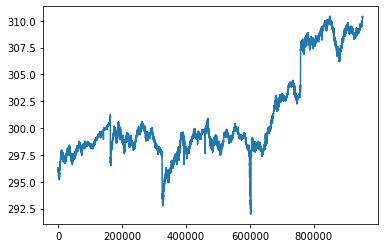

In [8]:
plt.plot(trades['Trade_Price'].values)

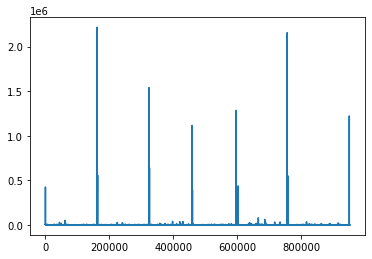

In [9]:
plt.plot(trades['Trade_Volume'].values)

### Example Quote Query

Includes support for multiple exchanges (Required by the Order Protection Rule)

In [10]:
exchange="'N','K','P','T','X','Z','Q','C','J','B','Y','V','M','A'"
symbol='AAPL'
start= "2020-01-01"
end="2020-01-10"


In [11]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

In [12]:
result=conn.client_get_quotes(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Quote Query for 'N','K','P','T','X','Z','Q','C','J','B','Y','V','M','A' AAPL 2020-01-01 2020-01-10
['N', 'K', 'P', 'T', 'X', 'Z', 'Q', 'C', 'J', 'B', 'Y', 'V', 'M', 'A']


INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


Load in first 20000 top of book quotes 

In [17]:
quotes=pd.read_csv("data/AAPL_quotes.csv") 

# ts realignment based on participant ts and dropping invalid observations 
quotes=clean_quotes(quotes)

quotes.to_csv('data/cleaned_quotes.csv')

/tmp/ipykernel_19754/3553158350.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  quotes=pd.read_csv("data/AAPL_quotes.csv")


In [18]:
quotes

,SIP_Timestamp,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,Source_Of_Quote,...,Best_Bid_Price,Best_Bid_Size,Best_Offer_Exchange,Best_Offer_Price,Best_Offer_Size,LULD_NBBO_Indicator,SIP_Generated_Message_Identifier,Security_Status_Indicator,National_BBO_Ind,date
2020-01-02 09:30:00.134062,2020-01-02 09:30:00.134429,P,AAPL,296.09,1.0,296.29,1.0,R,262393,N,...,296.24,2.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.134336,2020-01-02 09:30:00.134554,K,AAPL,296.21,1.0,296.39,1.0,R,262394,N,...,296.21,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.134532,2020-01-02 09:30:00.134742,K,AAPL,296.10,1.0,296.36,2.0,R,262401,N,...,296.10,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.136081,2020-01-02 09:30:00.136273,K,AAPL,296.10,1.0,296.29,1.0,R,262424,N,...,296.10,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
2020-01-02 09:30:00.234474,2020-01-02 09:30:00.234700,K,AAPL,296.11,1.0,296.39,1.0,R,263840,N,...,296.11,1.0,P,296.29,1.0,NaN,NaN,,2,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-09 19:59:47.657433,2020-01-09 19:59:47.657672,K,AAPL,310.38,20.0,310.40,7.0,R,33431302,N,...,310.38,20.0,Q,310.40,151.0,NaN,NaN,,2,2020-01-09
2020-01-09 19:59:48.734083,2020-01-09 19:59:48.734101,Q,AAPL,310.25,1.0,310.40,141.0,R,33431303,N,...,310.38,20.0,Q,310.40,141.0,NaN,NaN,,2,2020-01-09
2020-01-09 19:59:50.192198,2020-01-09 19:59:50.192454,K,AAPL,310.38,21.0,310.40,7.0,R,33431396,N,...,310.38,21.0,Q,310.40,141.0,NaN,NaN,,2,2020-01-09
2020-01-09 19:59:53.972434,2020-01-09 19:59:53.972452,Q,AAPL,310.25,1.0,310.40,140.0,R,33431420,N,...,310.38,21.0,Q,310.40,140.0,NaN,NaN,,2,2020-01-09


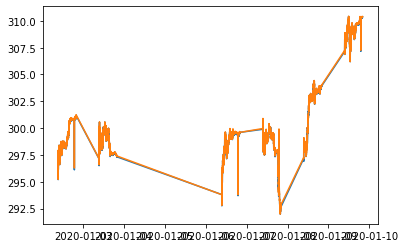

In [19]:
plt.plot(quotes['Best_Bid_Price'],label='Bid')
plt.plot(quotes['Best_Offer_Price'],label='Offer' )

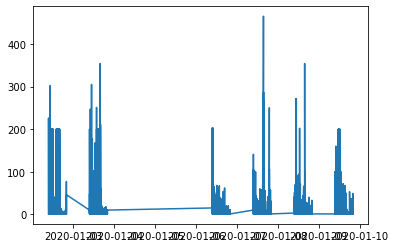

In [20]:
plt.plot(quotes['Bid_Size'],label='Bid Size')
